In [1]:
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#reading and storing train data
train = pd.read_csv("train.csv")
#reading and storing test data
test = pd.read_csv("test.csv")
##reading and storing stop words
f = open('stop_words.txt', 'r+')
s_words = f.read().splitlines()

In [4]:
def clean_data(x):
  #converting to lowercase
  x = x.apply(lambda x: x.astype(str).str.lower())
  #removing stop words
  for i in s_words : 
      x = x.replace(to_replace=r'\b%s\b'%i, value="",regex=True)
  #removing punctuations
  table = str.maketrans(dict.fromkeys(string.punctuation))
  for index, value in x['Tweet'].items():
      x['Tweet'][index]=x['Tweet'][index].translate(table)
  #removing numbers
  x = x.replace(to_replace=r'\d', value="",regex=True)
  return x

In [5]:
def word_split(sent): #A function to split a string into a list of words
  words = re.sub("[\W]"," ", sent).split()
  return words

In [6]:
clean_train=clean_data(train)
clean_test=clean_data(test)

In [7]:
#building vocabulary series for bag of words from train data
vocabulary= []
for x in clean_train['Tweet'].tolist():
    a = word_split(x)
    vocabulary.extend(a);
vocabulary = list(set(vocabulary))
vocab=pd.Series(vocabulary)
#print("end 1")
#building bag of words with vocabulary as columns and tweets as rows from train data
bow = pd.DataFrame (columns=vocab)
ss = len(vocab)
for x in clean_train['Tweet']:
    c = word_split(x)
    bow_vector = np.zeros(ss)
    for d in c:
        for i, y in enumerate(vocab):
            if y==d:
                bow_vector[i] = bow_vector[i] + 1
    #a = pd.DataFrame([bow_vector],columns = dup_vocab)
    bow = bow.append(pd.Series(bow_vector, index=vocab),ignore_index=True)
    #print(bow.shape)
dup_bow = bow
#print("end 2")
##building bag of words with vocabulary as columns and tweets as rows from test data
test_bow = pd.DataFrame (columns=vocab)
for x in clean_test['Tweet'].tolist():
    c = word_split(x)
    test_bow_vector = np.zeros(len(vocab))
    for d in c:
      for i, y in enumerate(vocab):
        if y==d:
          test_bow_vector[i] = test_bow_vector[i] + 1
    #a = pd.DataFrame([test_bow_vector],columns = dup_vocab)
    test_bow = test_bow.append(pd.Series(test_bow_vector, index=vocab),ignore_index=True)
    #print(test_bow.shape)
    #print(test_bow)
test_dup_bow = test_bow

In [8]:
train_labels=clean_train['Sentiment'] # Gold Labels
test_labels=clean_test['Sentiment']   # test labels

In [9]:
#defing the function for knn
def knn(k):
  print("For k = ",k)
  classifier = KNeighborsClassifier(n_neighbors=k, algorithm='brute')             #setting the value of neighbors and setting the algorithm 'brute', it will brute search through the nd.arrays
  classifier.fit(dup_bow.values,train_labels)                                     #assinging train data and train labels to the classifier
  predicted_labels = classifier.predict(test_dup_bow.values)                      #.predict takes test data's bag of words and return an array of predicted labels
  report = classification_report(test_labels, predicted_labels,output_dict=True)  #this line genrates a very comprehensive report of your classifier
  accuracy.append(accuracy_score(test_labels, predicted_labels))                  #storing accuracy in an array
  precision.append(report['macro avg']['precision'])                              #storing precision in an array
  recall.append(report['macro avg']['recall'])                                    #storing recall in an array
  f1.append(report['macro avg']['f1-score'])                                      #storing f1-scores in an array
  print("Accuracy: ", accuracy_score(test_labels, predicted_labels))
  print(classification_report(test_labels, predicted_labels))
  print("Confusion Matrix: \n", confusion_matrix(test_labels, predicted_labels), "\n\n")

In [10]:
accuracy= []
precision= []
recall=[]
f1= []

knn(10)
knn(7)
knn(5)
knn(3)
knn(1)

For k =  10
Accuracy:  0.50085587127696
              precision    recall  f1-score   support

    negative       0.87      0.42      0.57      1834
     neutral       0.31      0.65      0.42       615
    positive       0.39      0.62      0.48       472

    accuracy                           0.50      2921
   macro avg       0.52      0.56      0.49      2921
weighted avg       0.67      0.50      0.52      2921

Confusion Matrix: 
 [[774 748 312]
 [ 78 398 139]
 [ 37 144 291]] 


For k =  7
Accuracy:  0.5087298870249914
              precision    recall  f1-score   support

    negative       0.84      0.44      0.58      1834
     neutral       0.30      0.62      0.40       615
    positive       0.43      0.62      0.50       472

    accuracy                           0.51      2921
   macro avg       0.52      0.56      0.50      2921
weighted avg       0.66      0.51      0.53      2921

Confusion Matrix: 
 [[814 755 265]
 [108 381 126]
 [ 44 137 291]] 


For k =  5
Accuracy

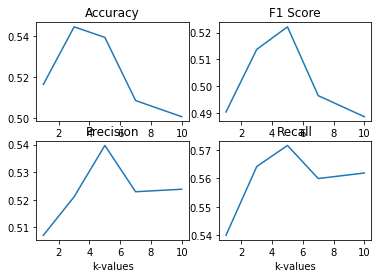

In [11]:
k= [10,7,5,3,1]
#Plotting graphs for accuracy, precision, recall, and f1-score against all k values
fig, axs = plt.subplots(2,2)
axs[0,0].plot(k,accuracy)
axs[0,0].set_title('Accuracy')
axs[1,0].plot(k,precision)
axs[1,0].set_title('Precision')
axs[1,1].plot(k,recall)
axs[1,1].set_title('Recall')
axs[0,1].plot(k,f1)
axs[0,1].set_title('F1 Score')
for ax in axs.flat:
    ax.set(xlabel='k-values')